<img src="./logo_UNSAM.jpg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº1: Síntesis de Señales
#### Mora Taranilla

# Introducción
Una señal digital es una representación de datos en forma de secuencia de valores discretos. A continuación serán definidos algunos coneceptos clave para comprender lo realizado a lo largo de este trabajo práctico. Ya que trabajamos con secuencias de valores discretos, no continuas, se realiza un proceso de *sampling* o también conocido como muestreo. En este proceso se toman muestras de la señal original cada cierto tiempo, si es fijo se lo llama *tiempo de sampleo (Ts)*, y se guardan los valores dentro de un vector. La cantidad de muestras pueden ser infinitas o finitas, en este caso trabajamos con una cantidad finita y la llamamos *N*. 

Al hablar de señales digitales, es más sencillo trabajar con la *frecuencia de sampleo (fs)*, la cual se define de la siguiente manera:
\begin{equation}
fs = \frac{1}{Ts}
\end{equation}
Las unidades de *fs* utilizadas en este trabajo son Hz, que equivalen a 1/s.

### Energía y Potencia promedio
Una de las características más relevantes a analizar de una señal es la energía, la cual se define a partir de la siguiente fórmula, si es que trata de una señal continua:
\begin{equation}
Ex = \int _{-\infty}^{\infty} |x(t)|^{2}\ dt
\end{equation}

Las unidades de energía se dan en Joules (J). Es importante tener en cuenta, que al definirse a través de una integral impropia, la misma puede diverger, es decir que la señal tenga energía infinita. Como en este caso trabajamos con secuencias de valores discretas, la fórmula a utilizar para medir la energía es:
\begin{equation}
Ex = \sum_ {n = -\infty}^{\infty} |x[n]|^{2}\
\end{equation}

Otra característica a tener en cuenta es la potencia promedio. La misma se define en señales discretas por:
\begin{equation}
Px = \lim_{N \to \infty} \frac{1}{2N+1} \sum_{n=-T}^{T} |x[n]|^{2}\
\end{equation}
si x[n] es una señal periódica de periodo T, entonces se puede utilizar 
\begin{equation}
Px =  \frac{1}{N} \sum_{n=0}^{N-1} |x[n]|^{2}\ 
\end{equation}
La unidad de la potencia se da en Watts (W).

Los dos conceptos mencionados anteriormente generan una clasificación dentro de las señales:
- Si Ex es finita, entonces la señal se define como una señal de energía, y Px=0
- Si Px es finita y distinta de cero, entonces se dice que la señal x[n] es una señal de potencia. En este caso Ex es infinita.
Es de suma importancia aclarar que una señal no puede ser de energía y potencia a la vez, puede ser una de ellas o ninguna. 

### Correlación
La correlación se utiliza para medir la similitud entre dos señales. Se calcula en caso de las señales discretas finitas a partir de la siguiente fórmula, siendo x[n] e y[n] las señales, y N la cantidad de muestras de cada señal:
\begin{equation}
rxy[m] = \sum_{n=0}^{N-1} x[n] \cdot y[n+m]
\end{equation}
El resultado es un nuevo vector, que para cada retraso m, se le asigna un valor de correlación. Este valor puede ser alto o bajo, y dependiendo de ello, se encuentra una similitud mayor o menor entre las señales para ese retraso m.
Una autocorrelación sigue la misma definición pero es una señal correlacionada consigo misma.

### Ortogonalidad
El concepto de ortogonalidad en señales discretas se define de la misma forma que la ortogonalidad entre vectores. Dos vectores son ortogonales cuando su producto interno es igual a 0. Para ello es necesario que ambos vectores (o señales) pertenezcan al mismo espacio vectorial, es decir la misma cantidad de muestras. Por lo tanto para verificar la ortogonalidad, se requiere calcular el prodto interno entre las señales de N muestras:
\begin{equation}
Producto Interno = \sum_{n = 0}^{N-1} x[n] \cdot y[n]
\end{equation}

# Análisis y Desarrollo del Trabajo
### Funciones y Librerías
Para llevar a cabo el trabajo, utilicé las siguientes librerías de Python:
- Numpy: Para trabajar con vectores y algunas operaciones sobre los mismos.
- Matplotlib: Para realizar los gráficos.
- Scipy: Para una función de correlación.
Además de utilizar funciones existentes, realicé funciones propias para generar las señales sinusoidales y cuadradas.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sign

def mi_funcion_sen( ax = 1, dc = 0, fx = 1, ph = 0, nn = 1000, fs = 1000):
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tt = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xx = ax * np.sin( 2 * np.pi * fx * tt + ph ) + dc
    
    return tt, xx

def mi_funcion_cuadrada ( ax = 1, dc = 0, fx = 1, ph = 0, nn = 1000, fs = 1000):
    Ts = 1/fs #tiempo de muestreo
    T_simulacion = nn * Ts # segundos
    
    tc = np.arange(start=0, stop=T_simulacion, step = Ts) #grilla temporal
    xc = ax * np.sign(np.sin( 2 * np.pi * fx * tt + ph ) + dc) #utilizo la funcion sign, que me devuelve -1 para valores negativos, 1 para positivos y 0 para 0.
    
    return tc, xc

Dentro de los parámetros de las funciones encontramos los siguientes componentes:
- ax: Amplitud de la Señal.
- dc: Hace referencia al valor medio, implica un desplazamiento sobre el eje de la amplitud.
- fx: Frecuencia de la Señal.
- ph: Fase de la Señal.
- nn: Cantidad de Muestras.
- fs: Frecuencia de Muestreo.
Ambas funciones dan como resultado dos vectores, de la misma longitud, tt contiene los datos de tiempo (tt[k]=t(kTs)), mientras que xx contiene el valor de la señal (xx[k]=xx[t(kTs)])

## Síntesis y Graficos de Señales
Para este primer punto, debíamos sintentizar y graficar las siguientes señales:
- Una señal sinusoidal de 2KHz.
- Misma señal amplificada y desfazada en π/2.
- Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia.
- Señal anterior recortada al 75% de su amplitud.
- Una señal cuadrada de 4KHz.
- Un pulso rectangular de 10ms.

En todos los casos utilicé una misma *fs = 4o KHz* (Por lo tanto una *Ts = 0,000025 s*) y misma cantidad de muestras *N = 1000*. De esta manera, todas las simulaciones tienen el mismo tiempo de simulación de *0,025 segundos*, y el vector *tt* va a ser igual para cada caso.

In [2]:
fs = 40000
Ts = 1/fs
N = 1000
T_simulacion = N/fs

### Sinusoidal de 2 KHz
En este caso decidí que la amplitud sea de 1. Una sinusoidal con esta frecuencia implica un periodo de *0,0005 s*.

La potencia para la sinusoidal de 2KHz es de 0.5 W


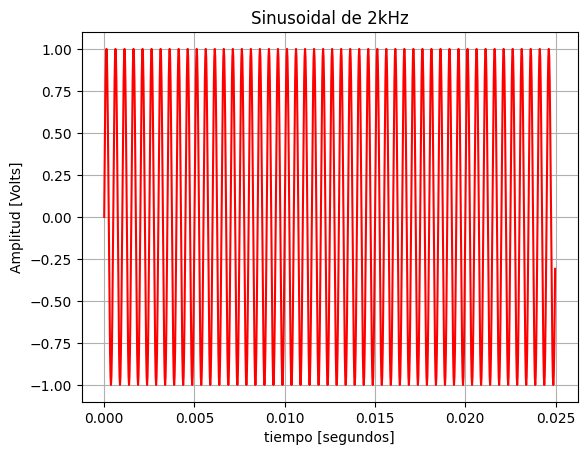

In [3]:
tt, x1 = mi_funcion_sen(fx = 2000, nn = N, fs = fs)
potx1 = np.mean(x1**2)

print(f'La potencia para la sinusoidal de 2KHz es de {potx1} W')

plt.figure(1)
plt.plot(tt, x1, color='red')
plt.title('Sinusoidal de 2kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

### Misma señal amplificada y desfazada en π/2
Decidí adjudicarle una amplitud de 2. Al desfazarla en π/2, lo que obtenemos es un coseno de la misma frecuencia.

La potencia para la sinusoidal de 2KHz, Amplitud 2 y fase π/2 es de 1.9999999999999996 W


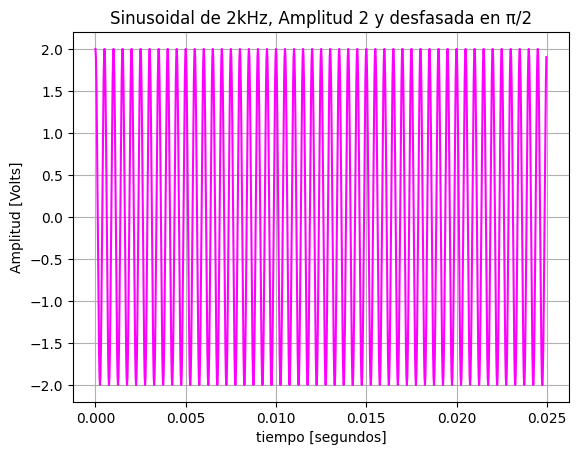

In [4]:
tt, x2 = mi_funcion_sen(ax=2, fx = 2000, ph = np.pi/2, nn = N, fs = fs)
potx2 = np.mean(x2**2)

print(f'La potencia para la sinusoidal de 2KHz, Amplitud 2 y fase π/2 es de {potx2} W')

plt.figure(2)
plt.plot(tt, x2, color='magenta')
plt.title('Sinusoidal de 2kHz, Amplitud 2 y desfasada en π/2')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

En el gráfico se puede observar claramente el desfasaje, ya que en el instante cero, el valor inicial es de 2V. Esto es algo esperado ya que al desfazarlo lo convertimos en un coseno, y el valor del coseno en tiempo cero es 1. Al multiplicarlo por la amplitud (2V), conseguimos el valor inicial.

### Misma señal modulada en amplitud por otra señal sinusoidal de la mitad de la frecuencia
Para llevarlo a cabo, utilice una nueva señal auxiliar con la mitad de la frecuencia que la primera (1 KHz) y la multipliqué por la señal original.

La potencia para la señal modulada es de 0.2500000000000001 W


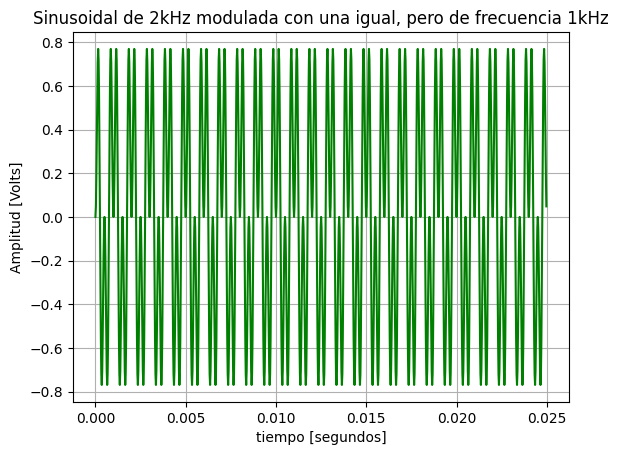

In [5]:
tt, xaux = mi_funcion_sen(fx = 1000, nn = N, fs = fs)
x3 = x1 * xaux
potx3 = np.mean(x3**2)

print(f'La potencia para la señal modulada es de {potx3} W')

plt.figure(3)
plt.plot(tt, x3, color='green')
plt.title('Sinusoidal de 2kHz modulada con una igual, pero de frecuencia 1kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

### Señal anterior recortada al 75% de su amplitud
Al haber utilizado una amplitud de 1V originalmente, en este caso se recortó a 0.75V. Para llevarlo a cabo utilicé una funcion de numpy (clip)

La potencia para la señal clippeada es de 0.3694466011250106 W


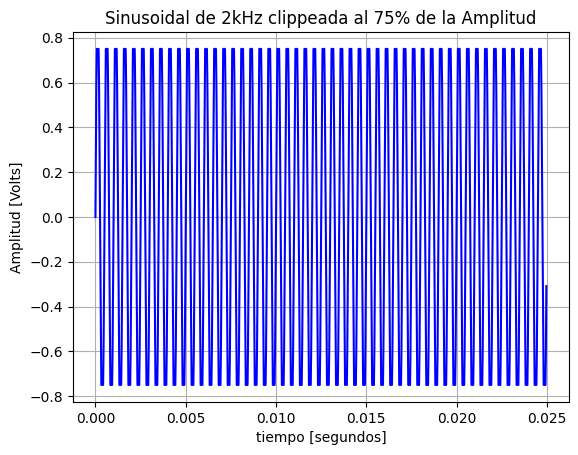

In [6]:
a4 = 1*0.75 #reduzco la amplitud en un 75%
x4 = np.clip(x1, -a4, a4)
potx4 = np.mean(x4**2)

print(f'La potencia para la señal clippeada es de {potx4} W')

plt.figure(4)
plt.plot(tt, x4, color='blue')
plt.title('Sinusoidal de 2kHz clippeada al 75% de la Amplitud')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

### Una señal cuadrada de 4KHz
Una señal cuadrada es una señal periódica que varía entre tres valores -1, 0 y 1. En este caso desarrollé una función propia que utiliza como base una sinusoidal y me devuelve el signo de la misma.

La potencia para la señal cuadrada de 4KHz es de 0.999 W


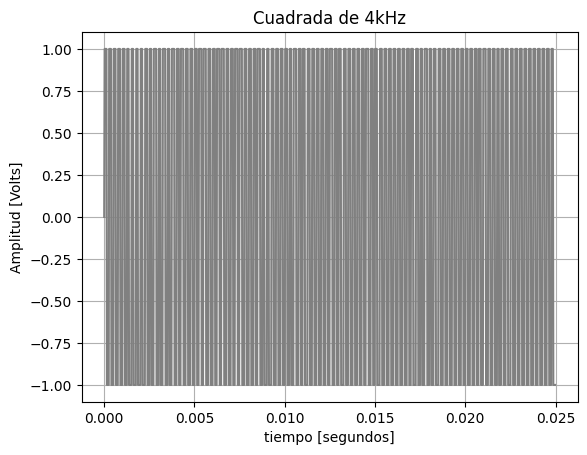

In [7]:
tc, x5 = mi_funcion_cuadrada (fx = 4000, nn = N, fs = fs)
potx5 = np.mean(x5**2)

print(f'La potencia para la señal cuadrada de 4KHz es de {potx5} W')

plt.figure(5)
plt.plot(tt, x5, color='grey')
plt.title('Cuadrada de 4kHz')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

### Un pulso rectangular de 10ms
En este caso calculé la energía, ya que no tratamos con una señal periódica.

La energia para el pulso rectangular es de 400.0 J


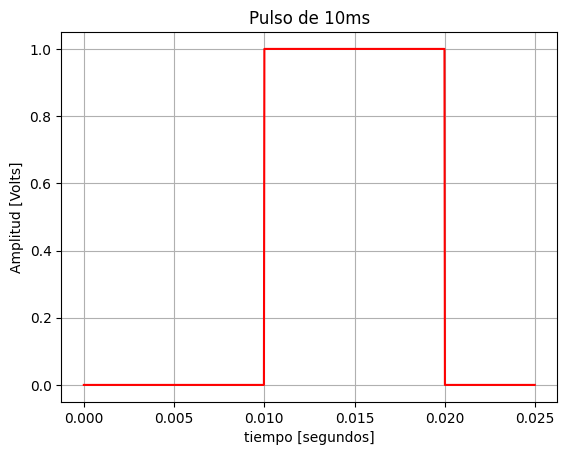

In [8]:
tp=np.arange(0,T_simulacion,Ts)
x6=np.zeros(1000)
x6[400:800]=1

def energia (xx):
    E=0
    long = len(xx)
    for k in range(long):
        E = E + (xx[k])**2
    return E
enx6 = energia(x6)

print(f'La energia para el pulso rectangular es de {enx6} J')

plt.figure(6)
plt.plot(tt, x6, color='red')
plt.title('Pulso de 10ms')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

## Ortogonalidad entre Señales
Se solicitaba verificar ortogonalidad entre la primera señal y las demás. Para realizarlo, utilicé una función de numpy (np.dot), que calcula el producto interno entre dos vectores.

In [9]:
prodx1x2 = np.dot(x1,x2)
prodx1x3 = np.dot(x1,x3)
prodx1x4 = np.dot(x1,x4)
prodx1x5 = np.dot(x1,x5)
prodx1x6 = np.dot(x1,x6)

print(f'El producto interno entre la primera y segunda señal es {prodx1x2}')
print(f'El producto interno entre la primera y tercera señal es {prodx1x3}')
print(f'El producto interno entre la primera y cuarta señal es {prodx1x4}')
print(f'El producto interno entre la primera y quinta señal es {prodx1x5}')
print(f'El producto interno entre la primera y sexta señal es {prodx1x6}')

El producto interno entre la primera y segunda señal es 3.788858116138272e-12
El producto interno entre la primera y tercera señal es -1.0835082830951137e-14
El producto interno entre la primera y cuarta señal es 427.2076277255258
El producto interno entre la primera y quinta señal es -8.000000000000211
El producto interno entre la primera y sexta señal es -2.279931375702174e-14


A partir de los resultados obtenidos, podemos analizar ciertas cuestiones. Tal como mencioné anteriormente, dos vectores son ortogonales entres si, si y solo si su producto interno es cero. En este caso, podemos observar que ninguno de los resultados dio cero, ¿esto implica que no hay ortogonalidad en ningun caso? No necesariamente. Algunos de los resultados son realmente muy pequeños, como en el caso de la segunda, tercera y sexta señales, y si analizamos las señales que estamos comparando, deberían ser ortogonales, ¿a qué se debe entonces el hecho de que ninguna sea cero? Esto se debe a que los valores dentro de nuestros vectores, al ser números de máquina, no representan idénticamente los valores reales de la señal, sino que se produce un redondeo o truncamiento de los mismos. Estos redondeos y truncamientos adjudican un error a nuestras cuentas, obteniendo así resultados cercanos a cero, pero no cero.

Es por ello que en situaciones como estas, al tener numeros tan pequeños, de orden menor o similar a 10^-12, si podemos decir que son ortogonales igualmente. En base a esto, si pedimos un recorte de decimales a los 10 digitos despues de la coma, obtenemos lo siguiente:

In [10]:
print(f'El producto interno entre la primera y segunda señal es {prodx1x2:.10f}')
print(f'El producto interno entre la primera y tercera señal es {prodx1x3:.10f}')
print(f'El producto interno entre la primera y cuarta señal es {prodx1x4:.10f}')
print(f'El producto interno entre la primera y quinta señal es {prodx1x5:.10f}')
print(f'El producto interno entre la primera y sexta señal es {prodx1x6:.10f}')

El producto interno entre la primera y segunda señal es 0.0000000000
El producto interno entre la primera y tercera señal es -0.0000000000
El producto interno entre la primera y cuarta señal es 427.2076277255
El producto interno entre la primera y quinta señal es -8.0000000000
El producto interno entre la primera y sexta señal es -0.0000000000


De esta manera, podemos decir que en caso de la segunda, tercera y sexta señal si son ortogonales con la primera. En caso de la cuarta y quinta, diremos que no son ortogonales, porque los valores de producto interno son distintos de cero.

## Correlaciones
Tal como definí antes, la correlación es una herramienta que permite analizar la similitud entre dos señales. Se solicitaba graficar la autocorrelación de la primera señal y la correlación de la primera con las demás. Utilicé una funcion de scipy.signal para calcular las correlaciones.

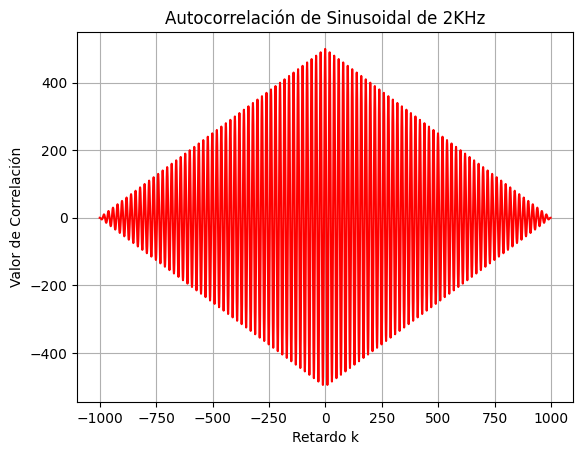

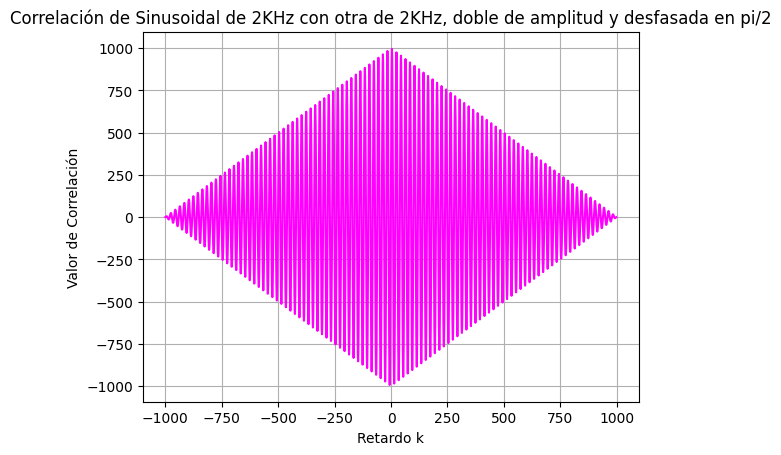

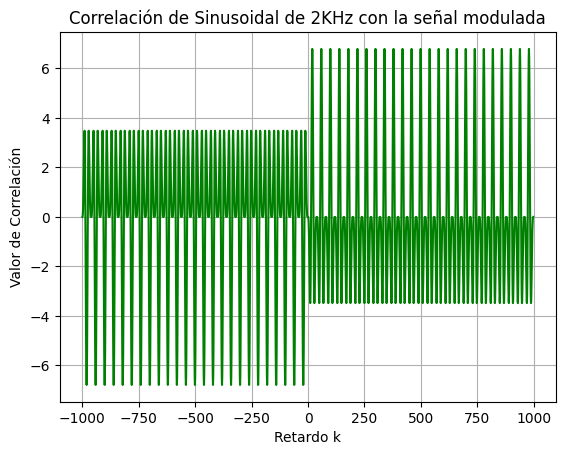

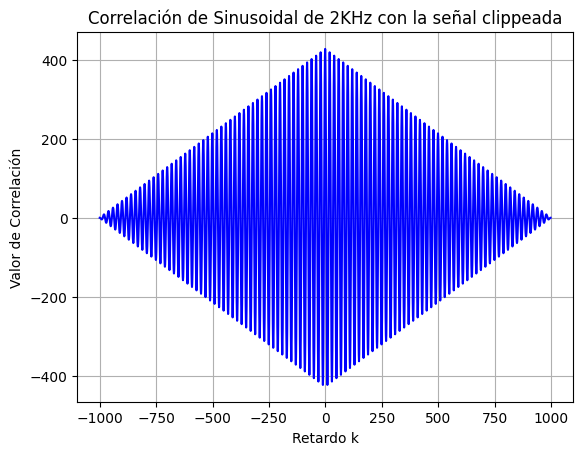

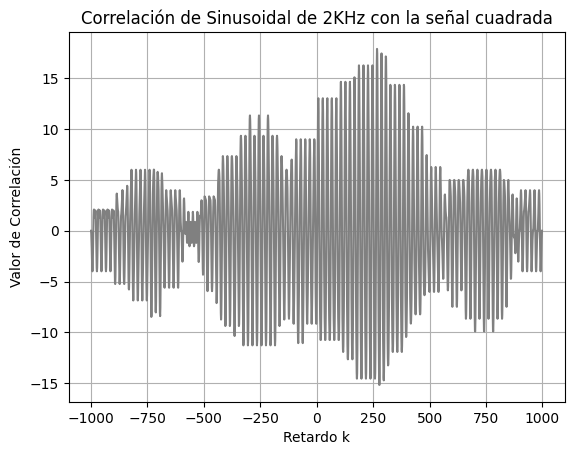

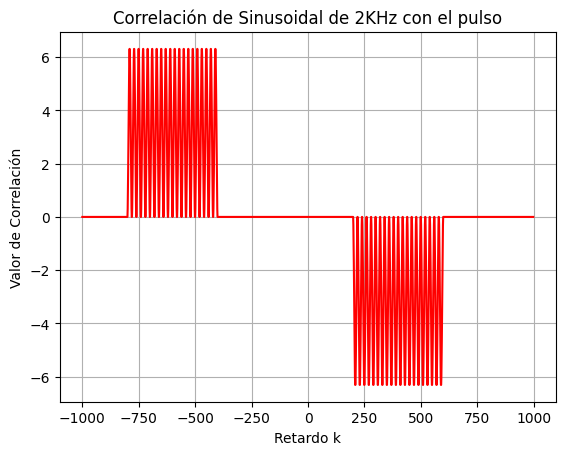

In [12]:
def correlacion (v1, v2):
    rv1v2 = sign.correlate(v1,v2)
    eje_rv1v2 = np.arange(-(N), N-1)
    return rv1v2, eje_rv1v2

rx1x1, eje_correlx1 = correlacion(x1,x1)
rx1x2, eje_correlx2 = correlacion(x1,x2)
rx1x3, eje_correlx3 = correlacion(x1,x3)
rx1x4, eje_correlx4 = correlacion(x1,x4)
rx1x5, eje_correlx5 = correlacion(x1,x5)
rx1x6, eje_correlx6 = correlacion(x1,x6)

#Grafico las correlaciones
plt.figure(7)
plt.plot(eje_correlx1, rx1x1, color='red')
plt.title('Autocorrelación de Sinusoidal de 2KHz')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.figure(8)
plt.plot(eje_correlx2, rx1x2, color='magenta')
plt.title('Correlación de Sinusoidal de 2KHz con otra de 2KHz, doble de amplitud y desfasada en pi/2')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.figure(9)
plt.plot(eje_correlx3, rx1x3, color='green')
plt.title('Correlación de Sinusoidal de 2KHz con la señal modulada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.figure(10)
plt.plot(eje_correlx4, rx1x4, color='blue')
plt.title('Correlación de Sinusoidal de 2KHz con la señal clippeada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.figure(11)
plt.plot(eje_correlx5, rx1x5, color='grey')
plt.title('Correlación de Sinusoidal de 2KHz con la señal cuadrada')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.figure(12)
plt.plot(eje_correlx6, rx1x6, color='red')
plt.title('Correlación de Sinusoidal de 2KHz con el pulso')
plt.grid(True)
plt.xlabel('Retardo k')
plt.ylabel('Valor de Correlación')

plt.show()

## 2⋅sin(α)⋅sin(β)=cos(α−β)−cos(α+β)
### Demostración de Identidad Trigonométrica

In [13]:
from IPython.display import IFrame
IFrame("\Identidad_Trigonometrica.pdf", width=1000, height=1000)

### ¿Se cumple para señales sinusoidales?
Para verificar que efectivamente si se cumple la relación utilicé *x1* y *xaux*.

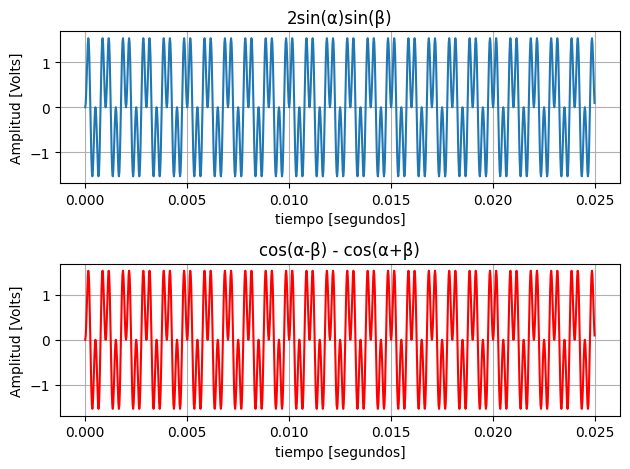

In [15]:
#Voy a utilizar las sinusoidales realizadas anteriormente: x1 y xaux, que son iguales pero una tiene frecuencia 2KHz y la otra 1KHz
xx4i = 2*xaux*x1

#Para el otro lado del igual, utilizo una sinusoidal desfasada en pi/2 para realizar los cosenos. 
tt, xx4aux1 = mi_funcion_sen(fx = 1000,ph = np.pi/2, nn = 1000, fs = 40000)
tt, xx4aux2 = mi_funcion_sen(fx = 3000,ph = np.pi/2, nn = 1000, fs = 40000)

xx4ii=np.zeros(1000) #Inicializo el array

for k in range(1000):
    xx4ii[k] = xx4aux1[k] - xx4aux2[k]

plt.figure(13)

plt.subplot(2,1,1) #Grafico un lado del igual
plt.plot(tt, xx4i)
plt.title('2sin(α)sin(β)')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')

plt.subplot(2,1,2) #Grafico el otro lado del igual
plt.plot(tt, xx4ii, color='red')
plt.title('cos(α-β) - cos(α+β)')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')

plt.tight_layout() #Para que se visualice bien ambos graficos y que no se superponga el texto

plt.show()

Se puede observar, a partir de los gráficos, que existe una relación de similitud. Sin embargo, decidí realizar un nuevo gráfico para terminar de confirmar la igualdad. Resté a ambos lados del igual el término de cosenos, obteniendo 2⋅sin(α)⋅sin(β)-(cos(α−β)−cos(α+β))=0. Grafiqué esta nueva señal.

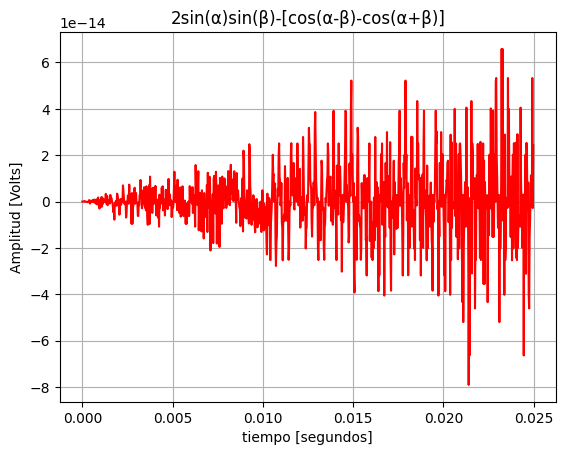

In [16]:
xx4 = np.zeros(1000)

for k in range(1000):
    xx4[k] = xx4i[k] - xx4ii[k]

plt.figure(14)
plt.plot(tt, xx4, color='red')
plt.title('2sin(α)sin(β)-[cos(α-β)-cos(α+β)]')
plt.grid(True)
plt.xlabel('tiempo [segundos]')
plt.ylabel('Amplitud [Volts]')
plt.show()

Tal como era esperado, esta resta se asemeja a cero. Podemos ver que el resultado no es una señal constante en cero, pero sus valores son menores en módulo a 10^-13, por lo que se puede suponer que nuevamente se debe a errores al discretizar las señales y redondeos. De esta manera se puede concluir que si se cumple la igualdad para señales sinusoidales.

# Conclusiones
En conclusión, este trabajo permite reparar sobre los conceptos y operaciones básicas de procesamiento de señales. En el primer apartado, pudimos visualizar gráficamente señales discretas, entre ellas sinusoidales, cuadradas y pulsos, mediante la manipulación de los parámetros.  
En segundo lugar, abordamos el concepto de ortogonalidad a través del producto interno. En un principio, a simple vista, no se obtuvieron los resultados esperados. Ningún producto interno tomo el valor nulo, pero de igual manera, haciendo reparo en los errores que conlleva trabajar con señales digitales, se concluyó que los valores en un rango de 10^-12 confirmaban la ortogonalidad entre señales.
Finalmente, en cuanto a la relación trigonométrica, concluímos que la validez de la identidad no se comprueba únicamente de manera algebráica, sino que también presenta una utilidad en cuanto a señales digitales.

# Autoevaluación
Sobre este trabajo puedo decir que logré resolverlo, pero con algunas dudas. Principalmente en el apartado de la correlación, logré graficarlo y entiendo el concepto, pero no pude analizar gráficamente que significaba. Ya tenía incorporado medianamente el lenguaje de Python, por lo que no tuve conflictos por ese lado, pero puedo decir que logré solidificar los conceptos principales sobre señales, y como los mismos afectan directamente a la representación gráfica. 
Como mencioné anteriormente, comprendo matemáticamente la correlación, pero me cuesta analizar los resultados gráficos. 
Si utilicé Gemini, principalmente para consultar cuales funciones de numpy y scipy podía utilizar. Fuera de ello, intenté realizar las cosas por mi cuenta. 